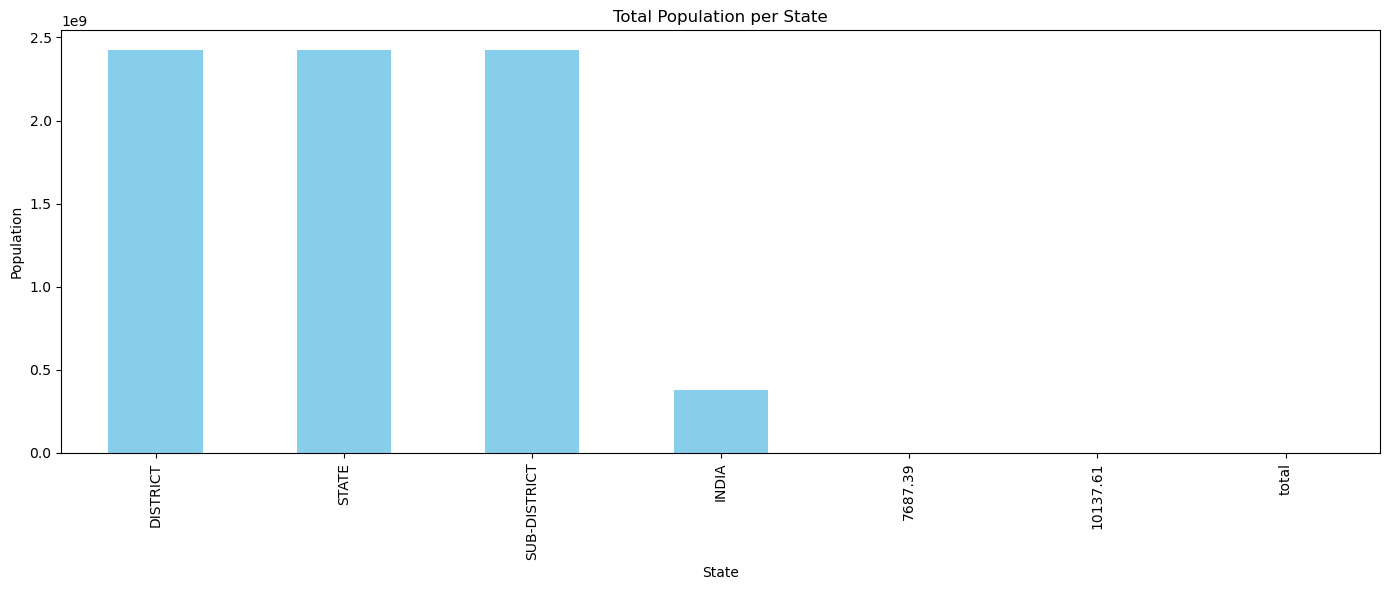

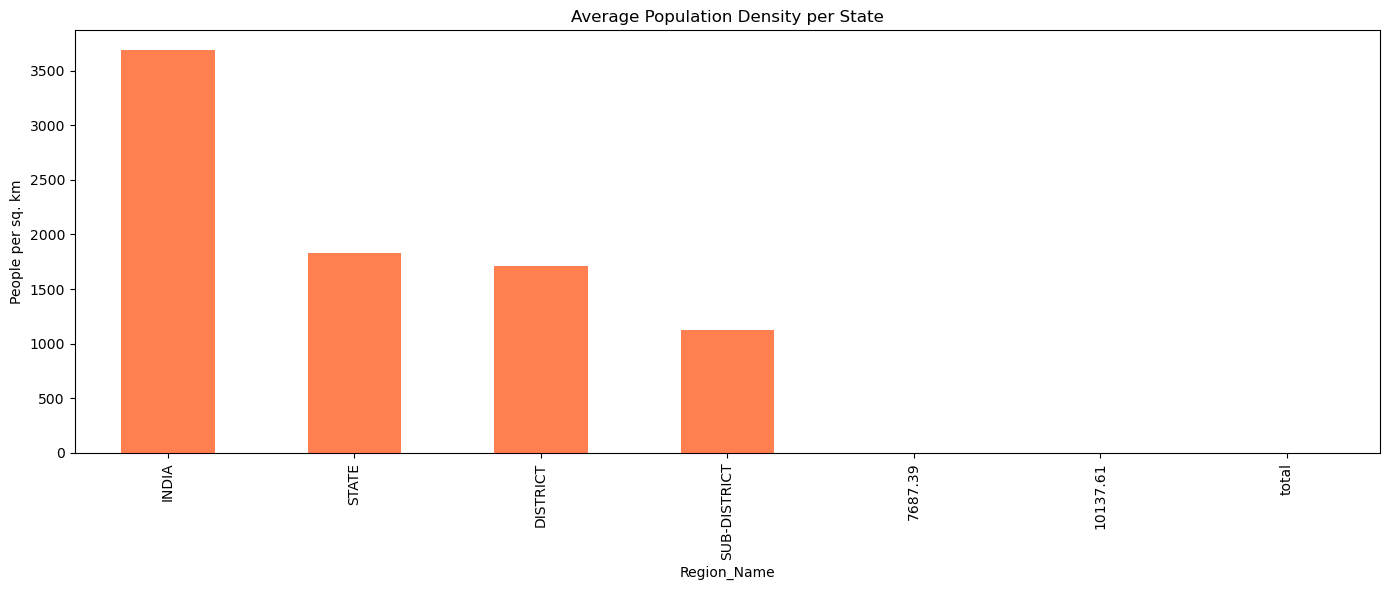

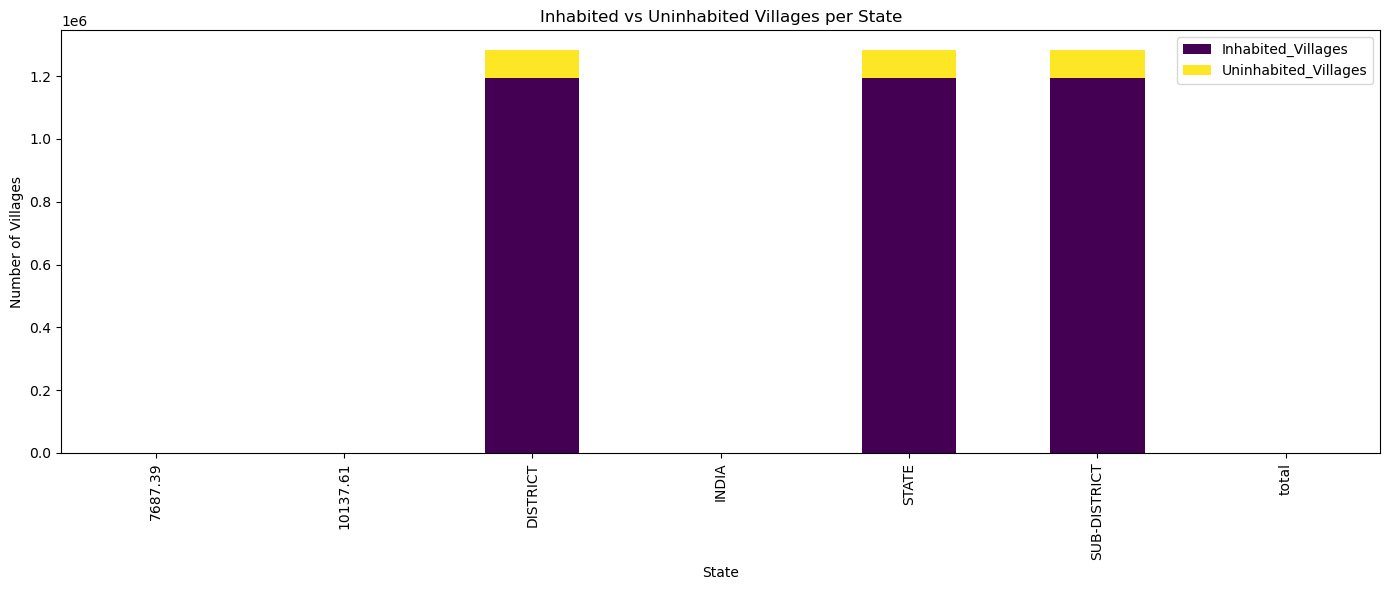

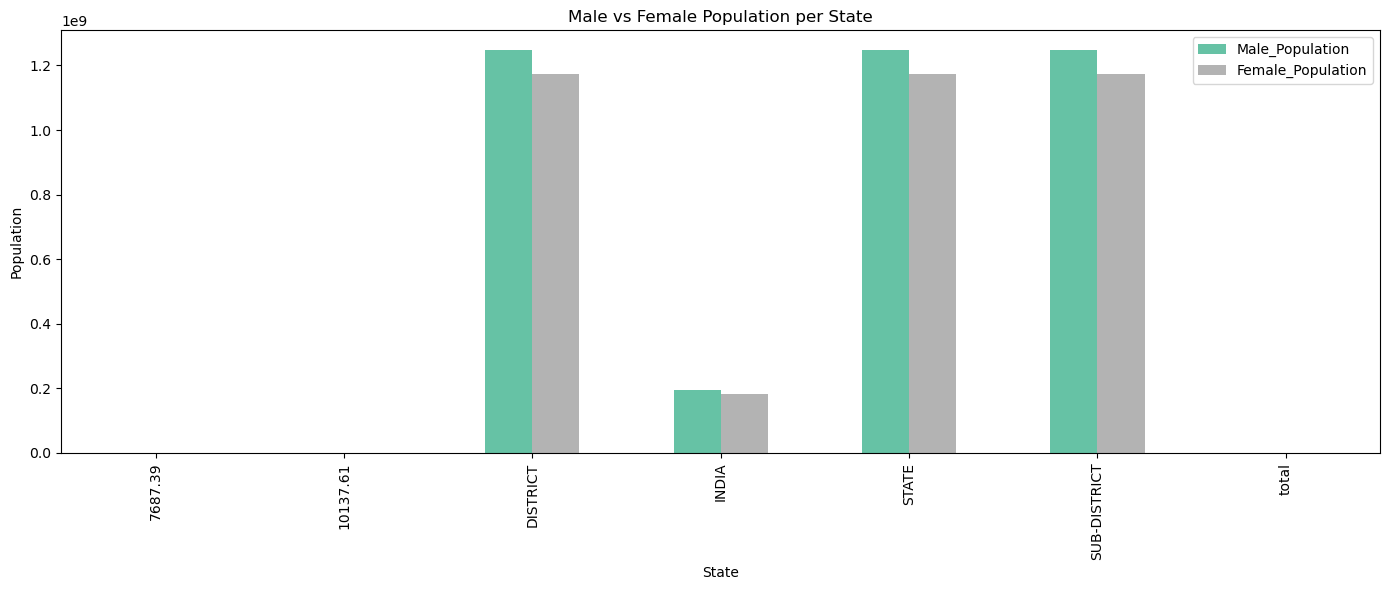

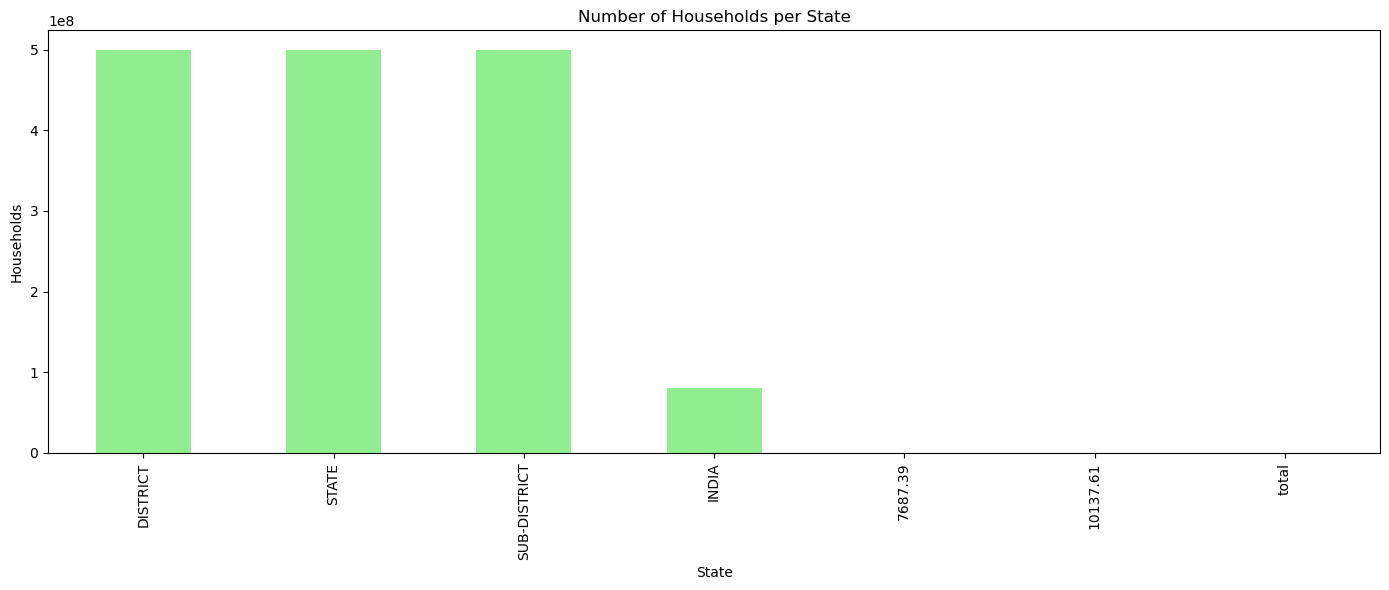

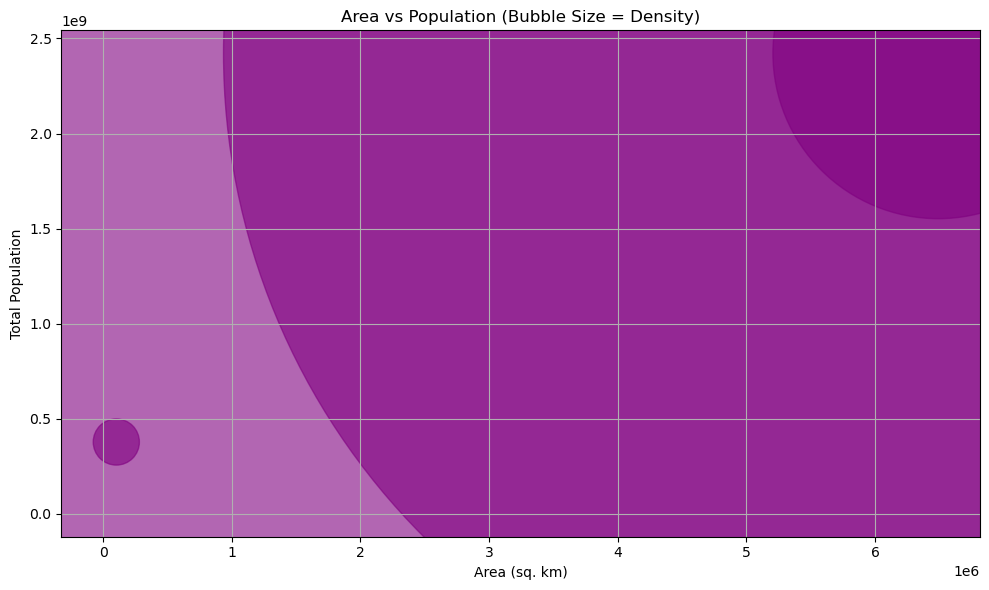

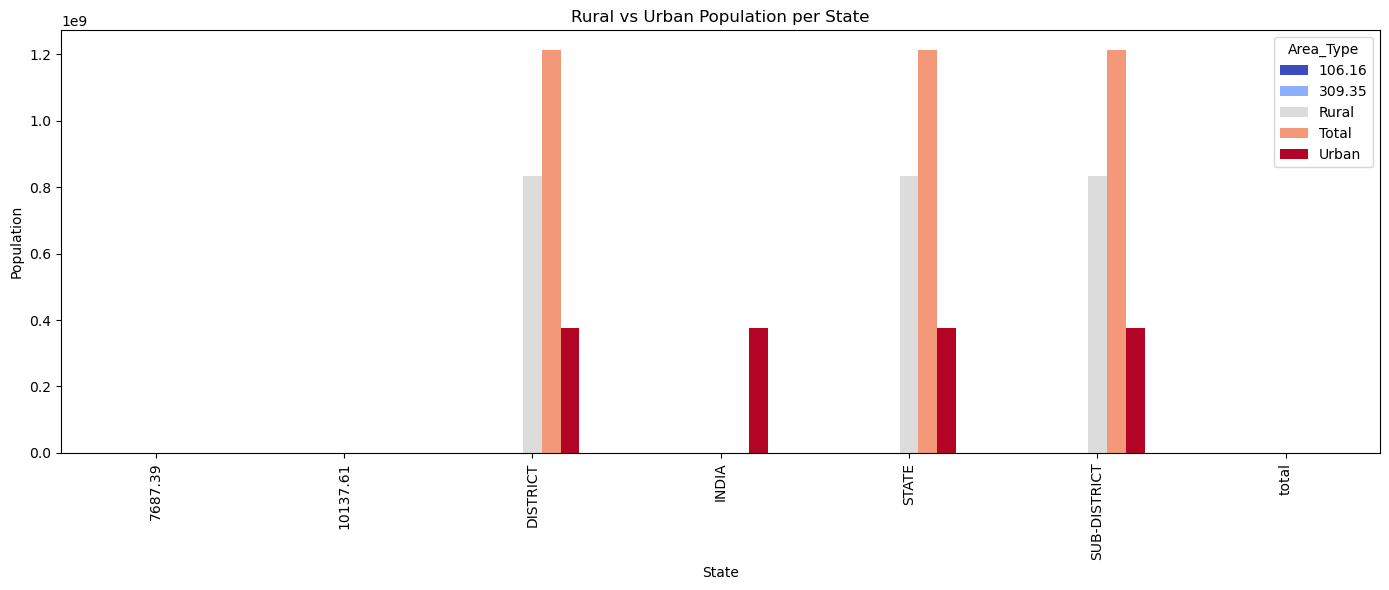

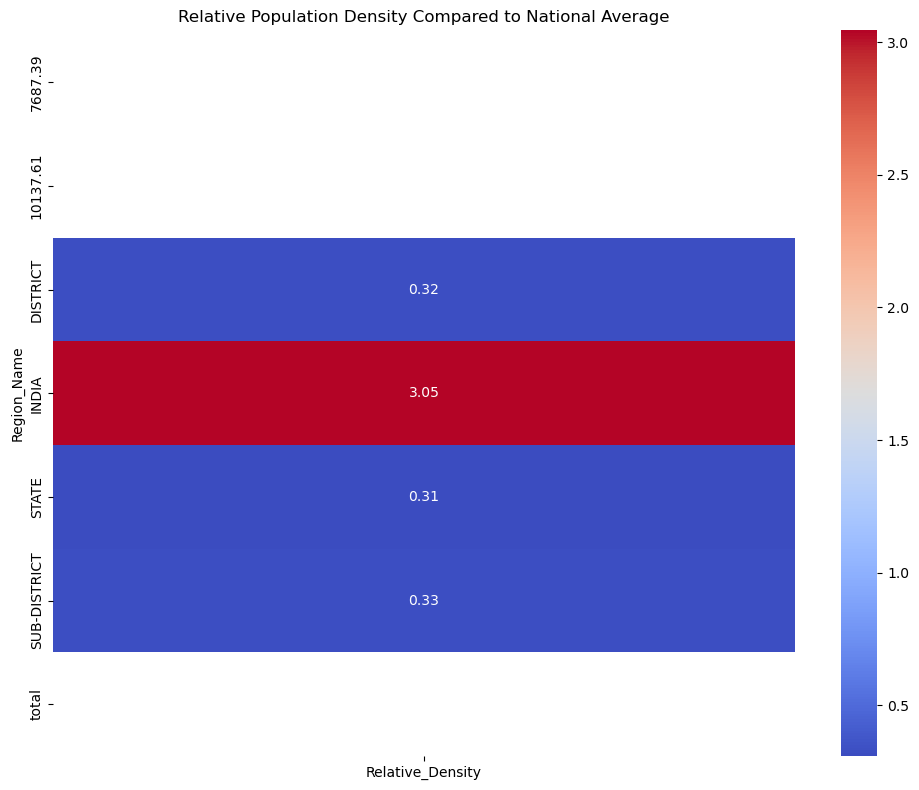

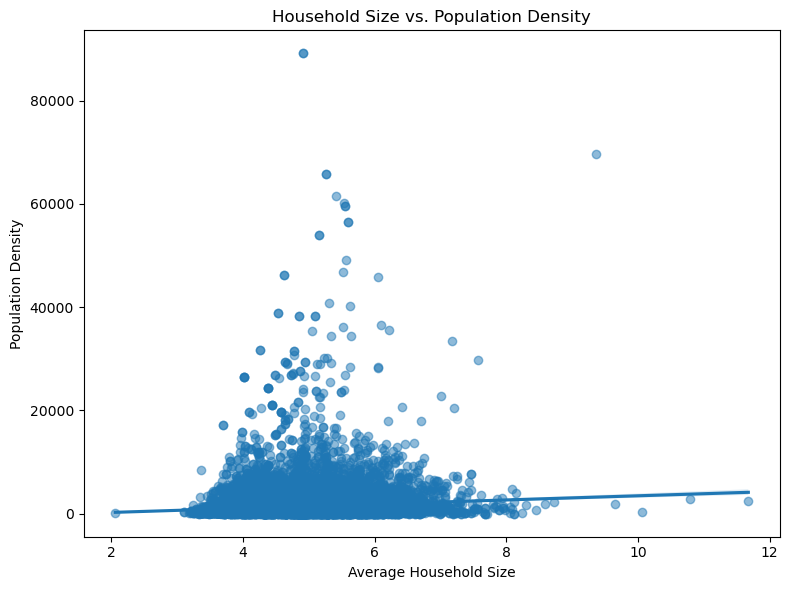

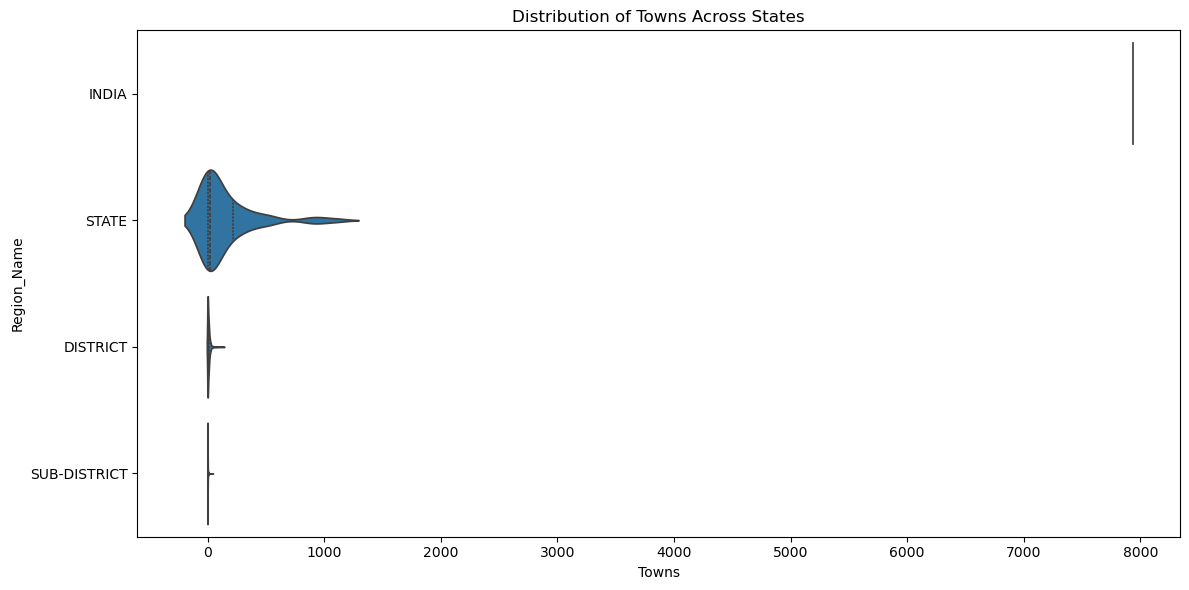

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:/Users/Siva-Pavan/Desktop/Projects/NO_OF_VILLAGES_TOWNS_HOUSEHOLDS_POPULATION_AND_AREA.xlsx"
df = pd.read_excel(file_path, skiprows=3)

df.columns = [
    "State_Code", "District_Code", "Sub_District_Code", "Region_Name",
    "Region_Alias", "Area_Type", "Inhabited_Villages", "Uninhabited_Villages",
    "Towns", "Households", "Total_Population", "Male_Population",
    "Female_Population", "Area_sq_km", "Population_Density"
]

df = df[df["Region_Name"].notna()]

numeric_columns = [
    "Inhabited_Villages", "Uninhabited_Villages", "Towns", "Households",
    "Total_Population", "Male_Population", "Female_Population",
    "Area_sq_km", "Population_Density"
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

pop_by_state = df.groupby("Region_Name")["Total_Population"].sum().sort_values(ascending=False)
pop_by_state.plot(kind='bar', figsize=(14,6), color='skyblue')
plt.title("Total Population per State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Population")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

density_by_state = df.groupby("Region_Name")["Population_Density"].mean().sort_values(ascending=False)
density_by_state.plot(kind='bar', figsize=(14,6), color='coral')
plt.title("Average Population Density per State", fontsize=14)
plt.ylabel("People per sq. km")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

village_counts = df.groupby("Region_Name")[["Inhabited_Villages", "Uninhabited_Villages"]].sum()
village_counts.plot(kind='bar', stacked=True, figsize=(14,6), colormap='viridis')
plt.title("Inhabited vs Uninhabited Villages per State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Number of Villages")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

gender_counts = df.groupby("Region_Name")[["Male_Population", "Female_Population"]].sum()
gender_counts.plot(kind='bar', figsize=(14,6), colormap='Set2')
plt.title("Male vs Female Population per State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Population")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

households = df.groupby("Region_Name")["Households"].sum().sort_values(ascending=False)
households.plot(kind='bar', figsize=(14,6), color='lightgreen')
plt.title("Number of Households per State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Households")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

scatter_df = df.groupby("Region_Name")[["Area_sq_km", "Total_Population", "Population_Density"]].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(
    scatter_df["Area_sq_km"], scatter_df["Total_Population"],
    s=scatter_df["Population_Density"] * 0.3,
    alpha=0.6,
    color='purple'
, c="red")
plt.title("Area vs Population (Bubble Size = Density, fontsize=14)")
plt.xlabel("Area (sq. km)")
plt.ylabel("Total Population")
plt.grid(True)
plt.tight_layout()
plt.show()

rural_urban = df.groupby(["Region_Name", "Area_Type"])["Total_Population"].sum().unstack()
rural_urban.plot(kind='bar', figsize=(14,6), colormap='coolwarm')
plt.title("Rural vs Urban Population per State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Population")
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

density = df.groupby("Region_Name")[["Total_Population", "Area_sq_km"]].sum()
density["Density"] = density["Total_Population"] / density["Area_sq_km"]
density["Relative_Density"] = density["Density"] / density["Density"].mean()
plt.figure(figsize=(10,8))
sns.heatmap(density[["Relative_Density"]], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Relative Population Density Compared to National Average", fontsize=14)
plt.tight_layout()
plt.show()

df["Household_Size"] = df["Total_Population"] / df["Households"]
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="Household_Size", y="Population_Density", scatter_kws={'alpha':0.5})
plt.title("Household Size vs. Population Density", fontsize=14)
plt.xlabel("Average Household Size")
plt.ylabel("Population Density")
plt.tight_layout()
plt.show()

towns = df[["Region_Name", "Towns"]].dropna()
plt.figure(figsize=(12,6))
sns.violinplot(
    data=towns,
    x="Towns",
    y="Region_Name",
    density_norm="width",
    inner="quartile",
    legend=False
)
plt.title("Distribution of Towns Across States", fontsize=14)
plt.tight_layout()
plt.show()